Карта 1: Случайный шум


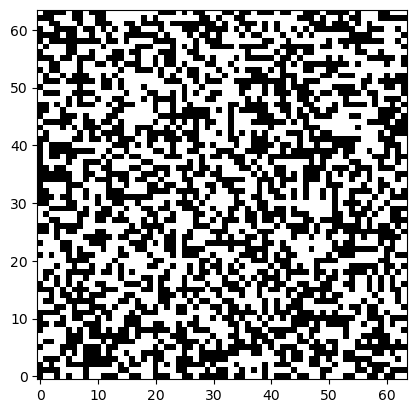

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def generate_random_map():
    return 1-np.array([[np.random.choice([0, 1]) for _ in range(64)] for _ in range(64)])

# Вывод карты:
print("Карта 1: Случайный шум")
plt.imshow(generate_random_map(), cmap='gray', origin='lower')
plt.show()



Карта 2: Клеточный автомат


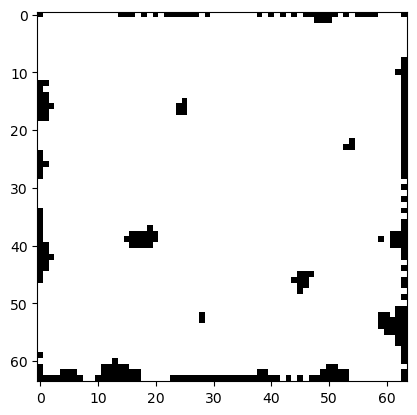

In [2]:
import random

def generate_cellular_automata_map():
    # Начальная генерация
    grid = [[1 if np.random.uniform() < 0.45 else 0 for _ in range(64)] for _ in range(64)]
    
    def count_neighbors(i, j, grid):
        count = 0
        for di in (-1, 0, 1):
            for dj in (-1, 0, 1):
                if di == 0 and dj == 0:
                    continue
                ni, nj = i + di, j + dj
                if 0 <= ni < 64 and 0 <= nj < 64:
                    count += grid[ni][nj]
                else:
                    # За границей считаем ячейку заполненной
                    count += 1
        return count
    
    # Применяем правило несколько раз (например, 4 итерации)
    for _ in range(4):
        new_grid = [[0]*64 for _ in range(64)]
        for i in range(64):
            for j in range(64):
                if count_neighbors(i, j, grid) >= 5:
                    new_grid[i][j] = 1
                else:
                    new_grid[i][j] = 0
        grid = new_grid
    return 1-np.array(grid)

# Вывод карты:
print("\nКарта 2: Клеточный автомат")
plt.imshow(generate_cellular_automata_map(), cmap='gray')
plt.show()


Карта 3: Круговая структура


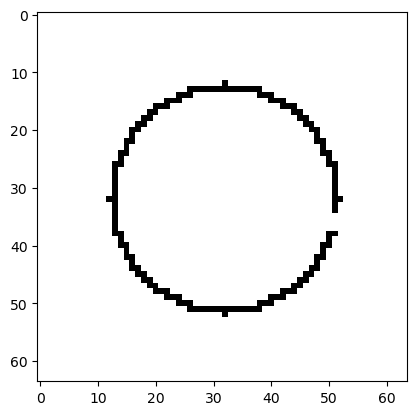

In [3]:
def generate_circular_map():
    center = 32
    radius_sq = 400  # 20^2
    grid = []
    for i in range(64):
        row = []
        for j in range(64):
            if (i - center)**2 + (j - center)**2 <= radius_sq:
                row.append(1)
            else:
                row.append(0)
        grid.append(row)
    bound_coords = []
    for i in range(64):
        for j in range(64):
            if (i - center)**2 + (j - center)**2 <= radius_sq - 48:
                grid[i][j] = 0
            elif grid[i][j] == 1:
                bound_coords.append((i, j))
    intro = bound_coords[np.random.choice(len(bound_coords))]
    for i in range(-1, 2):
        for j in range(-1, 2):
            grid[intro[0] + i][intro[1] + j] = 0
    return 1 - np.array(grid)

# Вывод карты:
print("\nКарта 3: Круговая структура")
plt.imshow(generate_circular_map(), cmap='gray')
plt.show()

Карта 4: Спираль


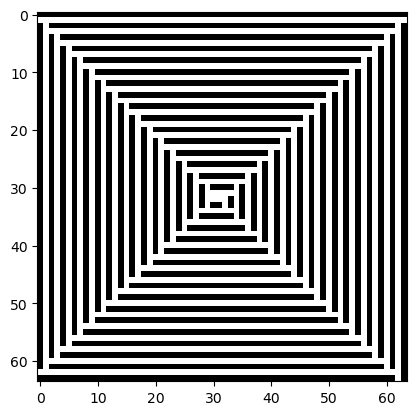

In [4]:
def generate_spiral_map():
    N = 64
    grid = [[0 for _ in range(N)] for _ in range(N)]
    top, bottom = 0, N - 1
    left, right = 0, N - 1
    direction = 0
    step = 2
    while top <= bottom and left <= right:
        if direction == 0:
            for j in range(left, right + 1):
                grid[top][j] = 1
            top += step
        elif direction == 1:
            for i in range(top, bottom + 1):
                grid[i][right] = 1
            right -= step
        elif direction == 2:
            for j in range(right, left - 1, -1):
                grid[bottom][j] = 1
            bottom -= step
        elif direction == 3:
            for i in range(bottom, top - 1, -1):
                grid[i][left] = 1
            left += step
        direction = (direction + 1) % 4
    return 1 - np.array(grid)

# Вывод карты:
print("Карта 4: Спираль")
plt.imshow(generate_spiral_map(), cmap='gray')
plt.show()



Карта 5: Симметричная карта


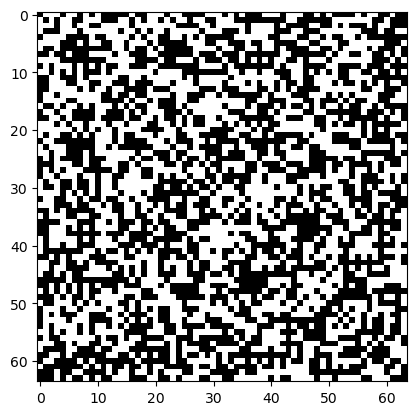

In [5]:
import random

def generate_symmetric_map():
    random.seed(0)
    grid = [[0 for _ in range(64)] for _ in range(64)]
    for i in range(64):
        for j in range(i, 64):
            val = np.random.choice([0, 1])
            grid[i][j] = val
            grid[j][i] = val
    return 1 - np.array(grid)

# Вывод карты:
print("\nКарта 5: Симметричная карта")
plt.imshow(generate_symmetric_map(), cmap='gray')
plt.show()



Карта 6: Шахматная доска


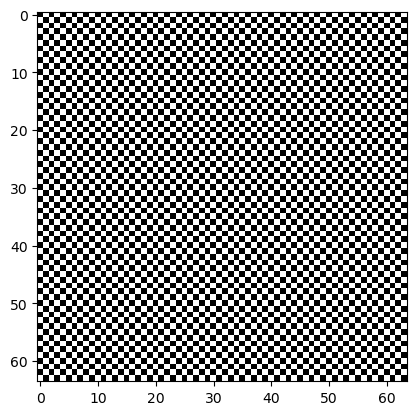

In [6]:
def generate_checkerboard_map():
    grid = []
    for i in range(64):
        row = []
        for j in range(64):
            if (i + j) % 2 == 0:
                row.append(1)
            else:
                row.append(0)
        grid.append(row)
    return 1 - np.array(grid)

# Вывод карты:
print("\nКарта 6: Шахматная доска")
plt.imshow(generate_checkerboard_map(), cmap='gray')
plt.show()


Карта 7: Вороной


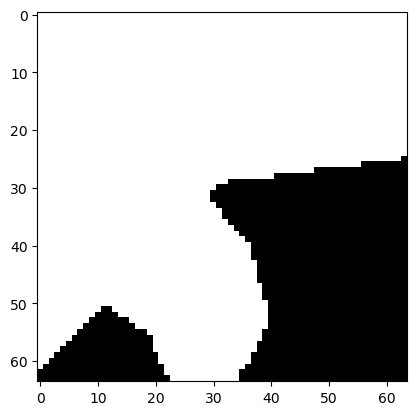

In [7]:
import random

def generate_voronoi_map():
    random.seed(0)
    num_seeds = 10
    seeds = [(np.random.randint(0, 63), np.random.randint(0, 63)) for _ in range(num_seeds)]
    grid = []
    for i in range(64):
        row = []
        for j in range(64):
            min_dist = float('inf')
            seed_index = 0
            for k, (si, sj) in enumerate(seeds):
                dist = (i - si)**2 + (j - sj)**2
                if dist < min_dist:
                    min_dist = dist
                    seed_index = k
            # Если индекс семени четный?, присваиваем 1, иначе 0
            row.append(1 if seed_index % 2 == 0 else 0)
        grid.append(row)
    return 1 - np.array(grid)

print("Карта 7: Вороной")
plt.imshow(generate_voronoi_map(), cmap='gray')
plt.show()



Карта 8: Лабиринт (случайный блуждающий путь)


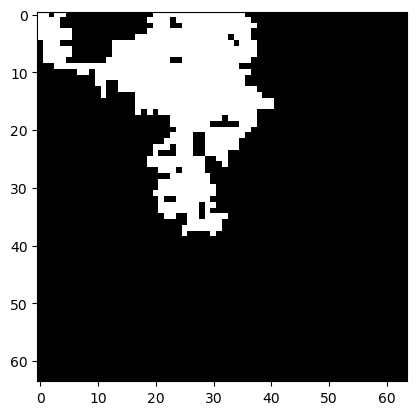

In [8]:
import random

def generate_random_walk_maze():
    N = 64
    grid = [[1]*N for _ in range(N)]
    x, y = 0, 0
    grid[x][y] = 0
    for _ in range(3000):
        dx, dy = random.choice([(0,1), (1,0), (0,-1), (-1,0)])
        nx, ny = x + dx, y + dy
        if 0 <= nx < N and 0 <= ny < N:
            x, y = nx, ny
            grid[x][y] = 0
    return 1 - np.array(grid)

print("\nКарта 8: Лабиринт (случайный блуждающий путь)")
plt.imshow(generate_random_walk_maze(), cmap='gray')
plt.show()


Карта 9: Sierpinski-подобная


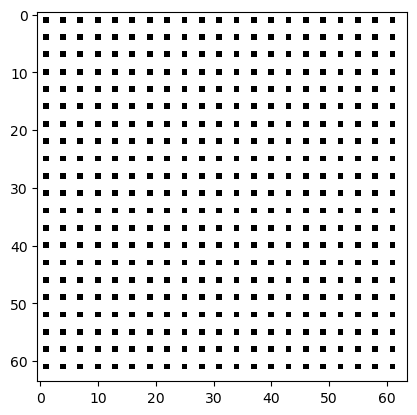

In [9]:
def generate_sierpinski_like_map():
    N = 64
    grid = []
    for i in range(N):
        row = []
        for j in range(N):
            # Если координаты удовлетворяют условию, ставим 0, иначе 1
            if i % 3 == 1 and j % 3 == 1:
                row.append(1)
            else:
                row.append(0)
        grid.append(row)
    return 1 - np.array(grid)

print("\nКарта 9: Sierpinski-подобная")
plt.imshow(generate_sierpinski_like_map(), cmap='gray')
plt.show()


Карта 10: Волновые интерференции


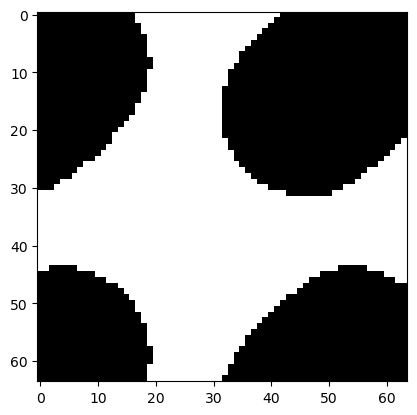

In [10]:
import math

def generate_wave_interference_map():
    grid = []
    for i in range(64):
        row = []
        for j in range(64):
            # Комбинируем несколько волн с различными параметрами
            value = math.sin(i / 8.0) + math.cos(j / 8.0) + 0.5 * math.sin((i + j) / 8.0)
            row.append(1 if value > 0 else 0)
        grid.append(row)
    return 1 - np.array(grid)

print("\nКарта 10: Волновые интерференции")
plt.imshow(generate_wave_interference_map(), cmap='gray')
plt.show()


Карта 11: Квадратные узоры


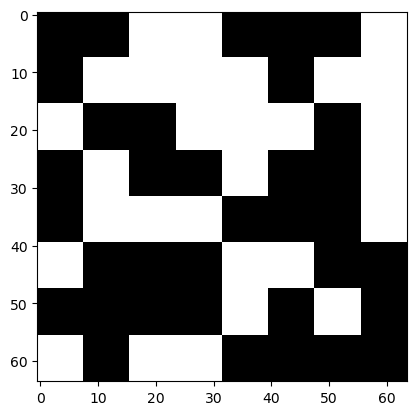

In [11]:
import random

def generate_block_pattern_map():
    grid = [[0] * 64 for _ in range(64)]
    block_size = 8
    for bi in range(0, 64, block_size):
        for bj in range(0, 64, block_size):
            block_val = random.choice([0, 1])
            for i in range(bi, bi + block_size):
                for j in range(bj, bj + block_size):
                    grid[i][j] = block_val
    return 1 - np.array(grid)

print("\nКарта 11: Квадратные узоры")
plt.imshow(generate_block_pattern_map(), cmap='gray')
plt.show()


Карта 12: Рандомизированная симметрия


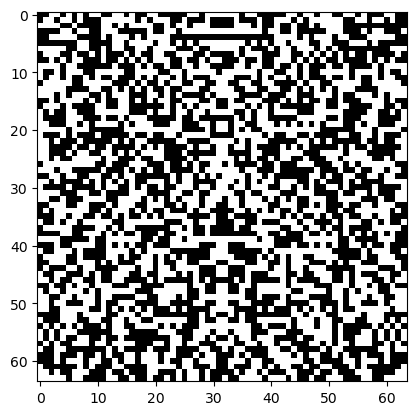

In [12]:
import random

def generate_random_symmetry_map():
    grid = [[0] * 64 for _ in range(64)]
    # Генерация левой половины (0-31 столбцы)
    for i in range(64):
        for j in range(32):
            grid[i][j] = random.choice([0, 1])
    # Зеркальное отражение с небольшим шумом
    for i in range(64):
        for j in range(32):
            if random.random() < 0.1:  # 10% шанс инвертировать значение
                grid[i][63 - j] = 1 if grid[i][j] == 0 else 0
            else:
                grid[i][63 - j] = grid[i][j]
    return 1 - np.array(grid)

print("\nКарта 12: Рандомизированная симметрия")
plt.imshow(generate_random_symmetry_map(), cmap='gray')
plt.show()


Карта 13: Альтернативные концентрические кольца


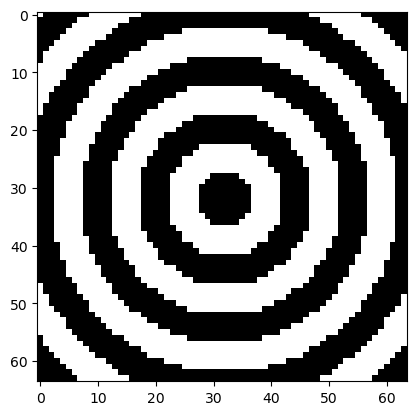

In [13]:
def generate_alternating_concentric_rings():
    center = 32
    ring_width = 5
    grid = []
    for i in range(64):
        row = []
        for j in range(64):
            distance = ((i - center)**2 + (j - center)**2) ** 0.5
            ring_index = int(distance // ring_width)
            row.append(1 if ring_index % 2 == 0 else 0)
        grid.append(row)
    return 1 - np.array(grid)

print("Карта 13: Альтернативные концентрические кольца")
plt.imshow(generate_alternating_concentric_rings(), cmap='gray')
plt.show()


Карта 14: Диагональные полосы


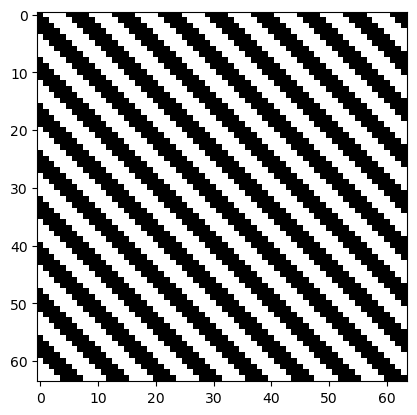

In [14]:
def generate_diagonal_stripes():
    stripe_width = 8
    grid = []
    for i in range(64):
        row = []
        for j in range(64):
            if ((i - j) % stripe_width) < stripe_width / 2:
                row.append(1)
            else:
                row.append(0)
        grid.append(row)
    return 1 - np.array(grid)

print("\nКарта 14: Диагональные полосы")
plt.imshow(generate_diagonal_stripes(), cmap='gray')
plt.show()


Карта 15: Рекурсивное деление


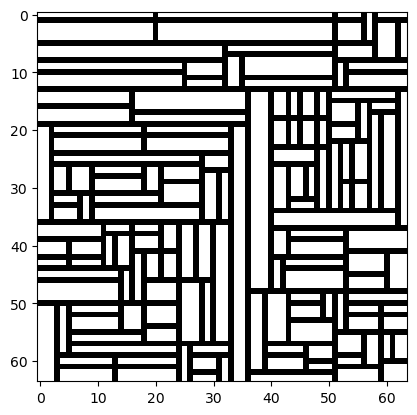

In [15]:
import random

def generate_recursive_division_map():
    grid = [[0 for _ in range(64)] for _ in range(64)]
    
    def divide(x, y, w, h, orientation):
        if w < 4 or h < 4:
            return
        if orientation == 'H':
            split = random.randint(y+1, y+h-2)
            for j in range(x, x+w):
                grid[split][j] = 1
            divide(x, y, w, split-y, 'V')
            divide(x, split+1, w, y+h-split-1, 'V')
        else:  # вертикальное деление
            split = random.randint(x+1, x+w-2)
            for i in range(y, y+h):
                grid[i][split] = 1
            divide(x, y, split-x, h, 'H')
            divide(split+1, y, x+w-split-1, h, 'H')

    divide(0, 0, 64, 64, 'H')
    return 1 - np.array(grid)

print("\nКарта 15: Рекурсивное деление")
plt.imshow(generate_recursive_division_map(), cmap='gray')
plt.show()

Карта 16: Горный профиль


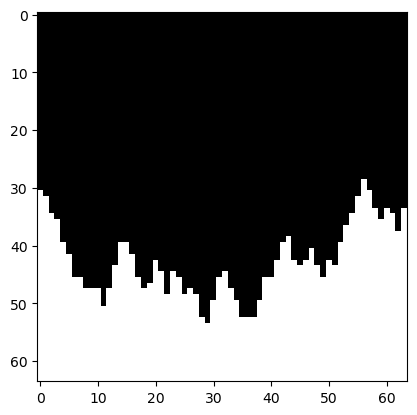

In [16]:
import random

def generate_mountain_profile():
    grid = []
    elevation = 32  # начальное значение высоты
    n = 4
    heights = []
    # Генерация высоты для каждой колонки
    for j in range(64):
        elevation += random.choice(np.arange(-n, n + 1))
        elevation = max(0, min(63, elevation))
        heights.append(elevation)
    # Формирование карты: строки, где для каждой колонки (j) клетки с i < heights[j] получают 1
    for i in range(64):
        row = []
        for j in range(64):
            row.append(1 if i < heights[j] else 0)
        grid.append(row)
    return 1 - np.array(grid)

print("Карта 16: Горный профиль")
plt.imshow(generate_mountain_profile(), cmap='gray')
plt.show()


Карта 17: Радиационное распространение


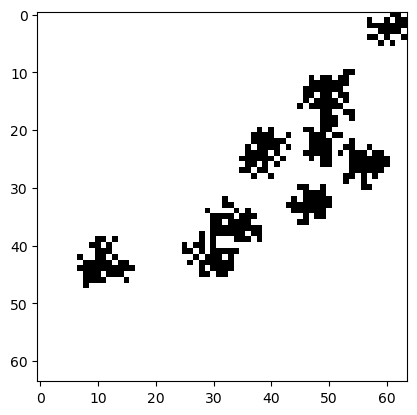

In [17]:
import random

def generate_radiation_map():
    grid = [[0 for _ in range(64)] for _ in range(64)]
    # Инициализируем случайными семенами (единицами)
    num_seeds = 10
    for _ in range(num_seeds):
        i = random.randint(0, 63)
        j = random.randint(0, 63)
        grid[i][j] = 1
    # Несколько итераций распространения
    for _ in range(5):
        new_grid = [row[:] for row in grid]
        for i in range(64):
            for j in range(64):
                if grid[i][j] == 0:
                    # Проверяем соседей
                    neighbors = []
                    for di in (-1, 0, 1):
                        for dj in (-1, 0, 1):
                            if di == 0 and dj == 0:
                                continue
                            ni, nj = i + di, j + dj
                            if 0 <= ni < 64 and 0 <= nj < 64:
                                neighbors.append(grid[ni][nj])
                    if any(neighbors) and random.random() < 0.3:
                        new_grid[i][j] = 1
        grid = new_grid
    return 1 - np.array(grid)

print("\nКарта 17: Радиационное распространение")
plt.imshow(generate_radiation_map(), cmap='gray')
plt.show()



Карта 18: Перлин-подобная


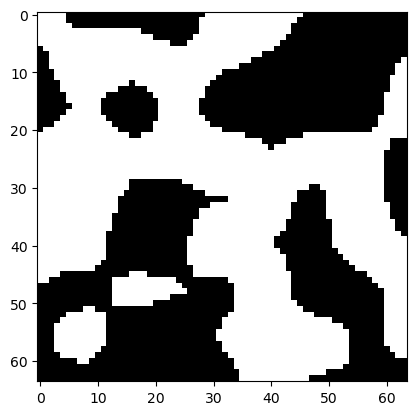

In [18]:
import random

def generate_perlin_like_map():
    coarse_size = 8
    # Создаём грубую сетку случайных значений размером (coarse_size+1) x (coarse_size+1)
    coarse = [[random.random() for _ in range(coarse_size+1)] for _ in range(coarse_size+1)]
    
    def lerp(a, b, t):
        return a + t * (b - a)
    
    def bilerp(x, y, q11, q21, q12, q22):
        r1 = lerp(q11, q21, x)
        r2 = lerp(q12, q22, x)
        return lerp(r1, r2, y)
    
    grid = []
    for i in range(64):
        row = []
        i_coarse = i / 8.0
        i0 = int(i_coarse)
        i1 = min(i0 + 1, coarse_size)
        y = i_coarse - i0
        for j in range(64):
            j_coarse = j / 8.0
            j0 = int(j_coarse)
            j1 = min(j0 + 1, coarse_size)
            x = j_coarse - j0
            # Билинейная интерполяция значений в точке
            value = bilerp(x, y, coarse[i0][j0], coarse[i0][j1], coarse[i1][j0], coarse[i1][j1])
            row.append(1 if value > 0.5 else 0)
        grid.append(row)
    return 1 - np.array(grid)

print("\nКарта 18: Перлин-подобная")
plt.imshow(generate_perlin_like_map(), cmap='gray')
plt.show()


Карта 19: Падающие капли


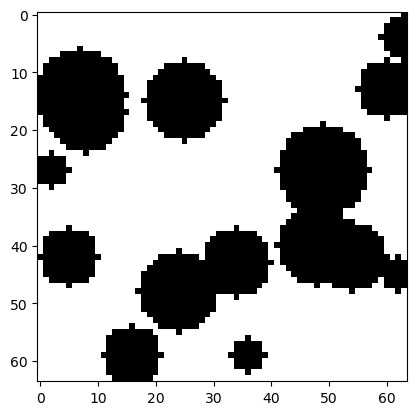

In [19]:
import random, math

def generate_droplets_map():
    grid = [[0 for _ in range(64)] for _ in range(64)]
    num_droplets = 15
    for _ in range(num_droplets):
        cx = random.randint(0, 63)
        cy = random.randint(0, 63)
        radius = random.randint(3, 8)
        for i in range(64):
            for j in range(64):
                if (i - cx)**2 + (j - cy)**2 <= radius**2:
                    grid[i][j] = 1
    return 1 - np.array(grid)

print("Карта 19: Падающие капли")
plt.imshow(generate_droplets_map(), cmap='gray')
plt.show()



Карта 20: Побитовое XOR


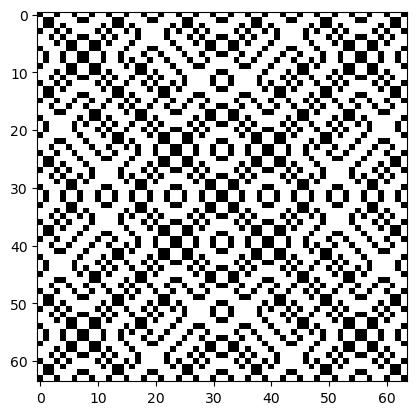

In [20]:
def generate_xor_map():
    grid = []
    for i in range(64):
        row = []
        for j in range(64):
            row.append(1 if (i ^ j) % 3 == 0 else 0)
        grid.append(row)
    return 1 - np.array(grid)

print("\nКарта 20: Побитовое XOR")
plt.imshow(generate_xor_map(), cmap='gray')
plt.show()



Карта 21: Лабиринт с возвратами (DFS)


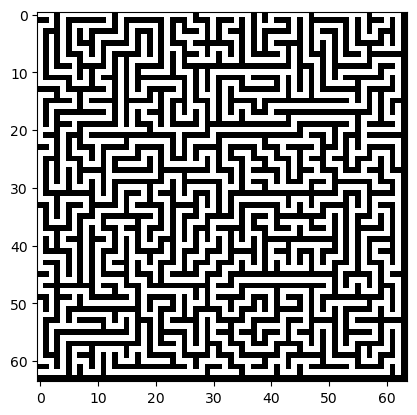

In [21]:
import random

def generate_maze_dfs():
    grid = [[1 for _ in range(64)] for _ in range(64)]
    start = (0, 0)
    stack = [start]
    grid[0][0] = 0
    directions = [(-2, 0), (2, 0), (0, -2), (0, 2)]
    
    def neighbors(cell):
        x, y = cell
        result = []
        for dx, dy in directions:
            nx, ny = x + dx, y + dy
            if 0 <= nx < 64 and 0 <= ny < 64:
                result.append((nx, ny))
        return result
    
    while stack:
        current = stack[-1]
        unvisited = [n for n in neighbors(current) if grid[n[0]][n[1]] == 1]
        if unvisited:
            next_cell = random.choice(unvisited)
            # Прорезаем проход между current и next_cell
            mid = ((current[0] + next_cell[0]) // 2, (current[1] + next_cell[1]) // 2)
            grid[next_cell[0]][next_cell[1]] = 0
            grid[mid[0]][mid[1]] = 0
            stack.append(next_cell)
        else:
            stack.pop()
    return 1 - np.array(grid)

print("\nКарта 21: Лабиринт с возвратами (DFS)")
plt.imshow(generate_maze_dfs(), cmap='gray')
plt.show()


Карта 22: Фрактальное дерево


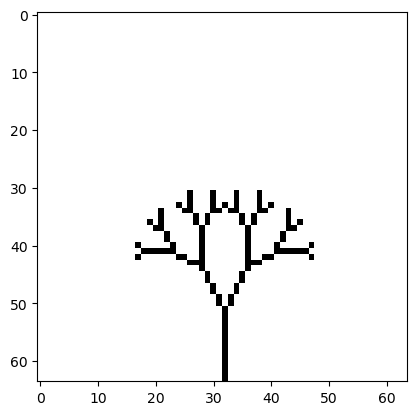

In [22]:
import math

def generate_fractal_tree_map():
    # Создаём пустую карту 64×64 (значения 0)
    grid = [[0 for _ in range(64)] for _ in range(64)]
    
    def draw_line(x0, y0, x1, y1):
        # Алгоритм Брезенхема для рисования линии
        dx = abs(x1 - x0)
        dy = abs(y1 - y0)
        sx = 1 if x0 < x1 else -1
        sy = 1 if y0 < y1 else -1
        err = dx - dy
        while True:
            if 0 <= x0 < 64 and 0 <= y0 < 64:
                grid[y0][x0] = 1  # Обратите внимание: y — индекс строки, x — столбца
            if x0 == x1 and y0 == y1:
                break
            e2 = 2 * err
            if e2 > -dy:
                err -= dy
                x0 += sx
            if e2 < dx:
                err += dx
                y0 += sy

    def branch(x, y, angle, length, depth):
        if depth == 0 or length < 1:
            return
        # Вычисляем конечную точку ветви
        x1 = x + int(round(math.cos(angle) * length))
        y1 = y + int(round(math.sin(angle) * length))
        draw_line(x, y, x1, y1)
        # Рекурсивно запускаем две ветви под углами ±30°
        branch(x1, y1, angle - math.pi/6, length * 0.7, depth - 1)
        branch(x1, y1, angle + math.pi/6, length * 0.7, depth - 1)
    
    # Запускаем дерево из нижней центральной точки, направляя вверх (-π/2)
    branch(32, 63, -math.pi/2, 12, 5)
    return 1 - np.array(grid)

print("Карта 22: Фрактальное дерево")
plt.imshow(generate_fractal_tree_map(), cmap='gray')
plt.show()



Карта 23: Случайные линии


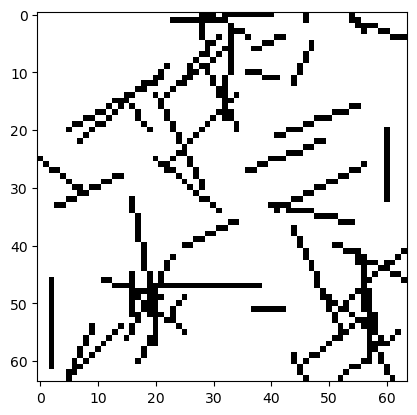

In [23]:
import random, math

def generate_random_lines_map():
    grid = [[0 for _ in range(64)] for _ in range(64)]
    
    def draw_line(x0, y0, x1, y1):
        dx = abs(x1 - x0)
        dy = abs(y1 - y0)
        sx = 1 if x0 < x1 else -1
        sy = 1 if y0 < y1 else -1
        err = dx - dy
        while True:
            if 0 <= x0 < 64 and 0 <= y0 < 64:
                grid[y0][x0] = 1
            if x0 == x1 and y0 == y1:
                break
            e2 = 2 * err
            if e2 > -dy:
                err -= dy
                x0 += sx
            if e2 < dx:
                err += dx
                y0 += sy
    
    # Рисуем, например, 50 случайных линий
    for _ in range(50):
        x0 = random.randint(0, 63)
        y0 = random.randint(0, 63)
        angle = random.uniform(0, 2 * math.pi)
        length = random.randint(5, 20)
        x1 = x0 + int(round(math.cos(angle) * length))
        y1 = y0 + int(round(math.sin(angle) * length))
        draw_line(x0, y0, x1, y1)
    
    return 1 - np.array(grid)

print("\nКарта 23: Случайные линии")
plt.imshow(generate_random_lines_map(), cmap='gray')
plt.show()



Карта 24: Логистический хаос


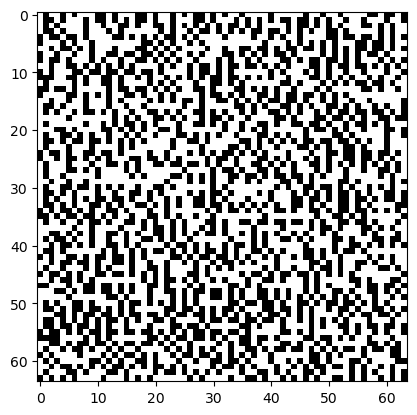

In [24]:
import random

def generate_logistic_chaos_map():
    r = 3.9
    grid = []
    for _ in range(64):
        row = []
        x = random.random()  # начальное значение для строки
        for _ in range(64):
            x = r * x * (1 - x)
            row.append(1 if x > 0.5 else 0)
        grid.append(row)
    return grid

print("\nКарта 24: Логистический хаос")
plt.imshow(generate_logistic_chaos_map(), cmap='gray')
plt.show()


Карта 25: Вихревые узоры


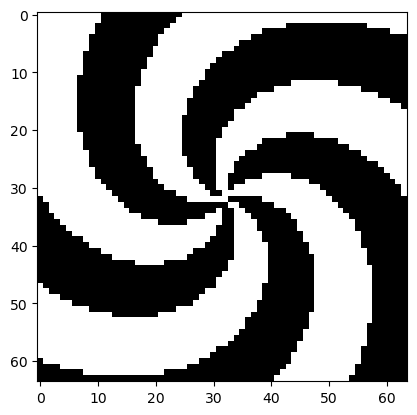

In [25]:
import math

def generate_swirl_map():
    center = 32
    grid = []
    for i in range(64):
        row = []
        for j in range(64):
            dx = i - center
            dy = j - center
            angle = math.atan2(dy, dx)
            distance = math.sqrt(dx**2 + dy**2)
            # Смешиваем угол и расстояние для создания вихревого эффекта
            value = math.sin(5 * angle + distance / 4.0)
            row.append(1 if value > 0 else 0)
        grid.append(row)
    return 1 - np.array(grid)

print("Карта 25: Вихревые узоры")
plt.imshow(generate_swirl_map(), cmap='gray')
plt.show()



Карта 26: Нерегулярная решетка


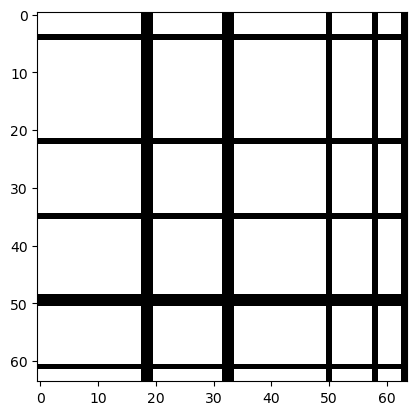

In [26]:
import random

def generate_irregular_grid():
    grid = [[0 for _ in range(64)] for _ in range(64)]
    # С вероятностью 10% выбираем строки для горизонтальных линий
    horizontal_lines = [i for i in range(64) if random.random() < 0.1]
    # С вероятностью 10% выбираем столбцы для вертикальных линий
    vertical_lines = [j for j in range(64) if random.random() < 0.1]
    
    for i in horizontal_lines:
        for j in range(64):
            grid[i][j] = 1
    for j in vertical_lines:
        for i in range(64):
            grid[i][j] = 1
    return 1 - np.array(grid)

print("\nКарта 26: Нерегулярная решетка")
plt.imshow(generate_irregular_grid(), cmap='gray')
plt.show()


Карта 27: Клеточный автомат — правило 30


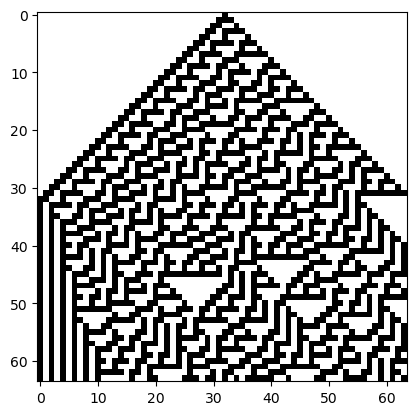

In [27]:
def generate_rule30():
    width = 64
    grid = []
    # Начальная строка: все 0, кроме центральной ячейки = 1
    row = [0] * width
    row[width // 2] = 1
    grid.append(row)
    for _ in range(63):
        new_row = [0] * width
        for j in range(width):
            # Получаем значения левого, центрального и правого соседей (вне границ считаем 0)
            left = row[j-1] if j-1 >= 0 else 0
            center_val = row[j]
            right = row[j+1] if j+1 < width else 0
            # Правило 30:
            # 111 -> 0, 110 -> 0, 101 -> 0, 100 -> 1, 011 -> 1, 010 -> 1, 001 -> 1, 000 -> 0
            pattern = (left << 2) | (center_val << 1) | right
            if pattern in [0b100, 0b011, 0b010, 0b001]:
                new_row[j] = 1
            else:
                new_row[j] = 0
        grid.append(new_row)
        row = new_row
    return 1 - np.array(grid)

print("\nКарта 27: Клеточный автомат — правило 30")
plt.imshow(generate_rule30(), cmap='gray')
plt.show()


Карта 28: Псевдоспираль


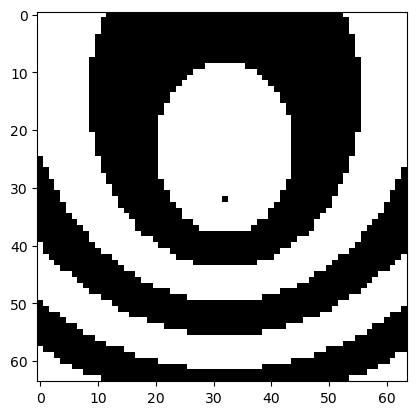

In [28]:
import math

def generate_pseudo_spiral():
    center = 32
    grid = []
    for i in range(64):
        row = []
        for j in range(64):
            dx = i - center
            dy = j - center
            distance = math.sqrt(dx**2 + dy**2)
            value = math.sin(distance / 3.0 + dx * 0.2)  # Спиральный эффект
            row.append(0 if value > 0 else 1)
        grid.append(row)
    return 1 - np.array(grid)

print("Карта 28: Псевдоспираль")
plt.imshow(generate_pseudo_spiral(), cmap='gray')
plt.show()



Карта 29: Дождевые разводы


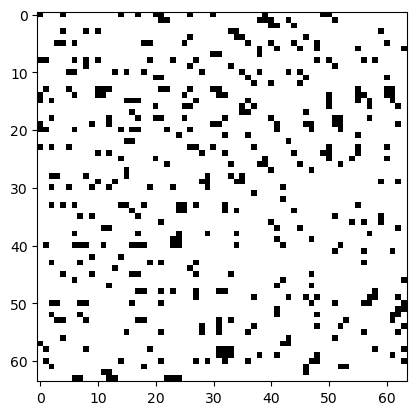

In [29]:
import random, math

def generate_rain_ripples():
    grid = [[1 for _ in range(64)] for _ in range(64)]
    
    num_ripples = 10  # Количество точек-источников
    ripple_centers = [(random.randint(0, 63), random.randint(0, 63)) for _ in range(num_ripples)]
    
    for i in range(64):
        for j in range(64):
            for cx, cy in ripple_centers:
                distance = math.sqrt((i - cx)**2 + (j - cy)**2)
                if int(distance) % 5 == 0:  # Разводы появляются через каждые 5 клеток
                    grid[i][j] = 0
    
    return 1 - np.array(grid)

print("\nКарта 29: Дождевые разводы")
plt.imshow(generate_rain_ripples(), cmap='gray')
plt.show()



Карта 30: Случайная текстура (Perlin Noise-подобная)


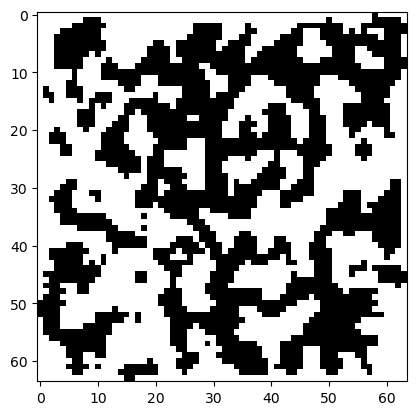

In [30]:
import random

def generate_random_texture():
    grid = [[random.randint(0, 1) for _ in range(64)] for _ in range(64)]

    # Применяем размытие: заменяем каждую ячейку на среднее её соседей
    for _ in range(2):  # Два прохода сглаживания
        new_grid = [[0 for _ in range(64)] for _ in range(64)]
        for i in range(64):
            for j in range(64):
                neighbors = [
                    grid[x][y] for x in range(max(0, i - 1), min(64, i + 2))
                               for y in range(max(0, j - 1), min(64, j + 2))
                ]
                new_grid[i][j] = 1 if sum(neighbors) > 4 else 0  # Усредняем
        grid = new_grid
    
    return 1 - np.array(grid)

print("\nКарта 30: Случайная текстура (Perlin Noise-подобная)")
plt.imshow(generate_random_texture(), cmap='gray')
plt.show()


Карта 31: Диффузионное агрегирование (DLA)


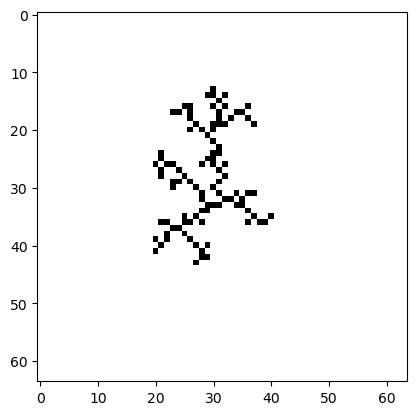

In [36]:
import random

def generate_dla_map(max_particles=100):
    n = 64
    grid = [[0 for _ in range(n)] for _ in range(n)]
    # Начинаем с единственной осаждённой частицы в центре
    grid[n//2][n//2] = 1
    
    def is_adjacent(i, j):
        for di in (-1, 0, 1):
            for dj in (-1, 0, 1):
                ni, nj = i + di, j + dj
                if 0 <= ni < n and 0 <= nj < n:
                    if grid[ni][nj] == 1:
                        return True
        return False

    particles = 1
    # Запускаем частички с границы, давая им блуждать до прилипания
    while particles < max_particles:
        # Запуск из случайной точки на границе
        side = random.choice(['top', 'bottom', 'left', 'right'])
        if side == 'top':
            i, j = 0, random.randint(0, n-1)
        elif side == 'bottom':
            i, j = n-1, random.randint(0, n-1)
        elif side == 'left':
            i, j = random.randint(0, n-1), 0
        else:  # right
            i, j = random.randint(0, n-1), n-1

        # Блуждание случайным образом
        while True:
            # Если рядом есть осаждённая частица, «прилипляем»
            if is_adjacent(i, j):
                grid[i][j] = 1
                particles += 1
                break
            # Случайный шаг (в 8 направлений)
            di, dj = random.choice([(-1, -1), (-1, 0), (-1, 1),
                                     (0, -1),           (0, 1),
                                     (1, -1),  (1, 0),  (1, 1)])
            ni, nj = i + di, j + dj
            # Если вышли за пределы, прерываем блуждание этой частицы
            if not (0 <= ni < n and 0 <= nj < n):
                break
            i, j = ni, nj
    return 1 - np.array(grid)

print("Карта 31: Диффузионное агрегирование (DLA)")
plt.imshow(generate_dla_map(), cmap='gray')
plt.show()


Карта 32: Эллиптические кольца


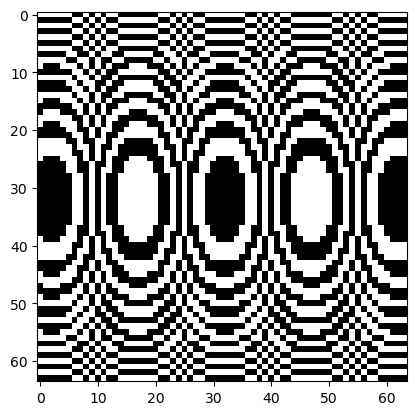

In [38]:
def generate_elliptical_rings():
    center = 32
    a, b = 20, 10  # Радиусы по горизонтали и вертикали
    ring_width = 3
    grid = []
    for i in range(64):
        row = []
        for j in range(64):
            # Нормированное расстояние по эллипсу
            distance = ((i - center)**2 / (a**2)) + ((j - center)**2 / (b**2))
            ring_index = int(distance // (ring_width / max(a, b)))
            row.append(1 if ring_index % 2 == 0 else 0)
        grid.append(row)
    return 1 - np.array(grid)

print("\nКарта 32: Эллиптические кольца")
plt.imshow(generate_elliptical_rings(), cmap='gray')
plt.show()



Карта 33: Разреженная кривая Гильберта


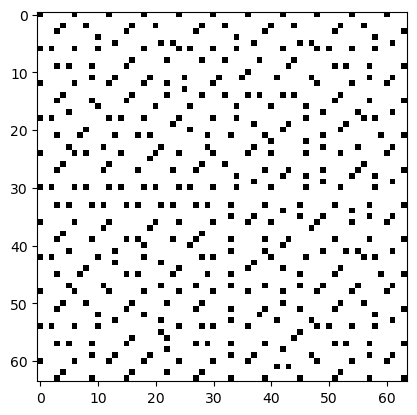

In [40]:
def rot(s, x, y, rx, ry):
    if ry == 0:
        if rx == 1:
            x = s - 1 - x
            y = s - 1 - y
        x, y = y, x
    return x, y

def d2xy(n, d):
    x = y = 0
    t = d
    s = 1
    while s < n:
        rx = (t // 2) & 1
        ry = (t ^ rx) & 1
        x, y = rot(s, x, y, rx, ry)
        x += s * rx
        y += s * ry
        t //= 4
        s *= 2
    return x, y

def generate_sparse_hilbert():
    n = 64
    grid = [[0 for _ in range(n)] for _ in range(n)]
    total = n * n
    step = 10  # Отмечаем каждую 10-ю точку
    for d in range(0, total, step):
        x, y = d2xy(n, d)
        grid[y][x] = 1  # Заметим: строка – y, столбец – x
    return 1 - np.array(grid)

print("\nКарта 33: Разреженная кривая Гильберта")
plt.imshow(generate_sparse_hilbert(), cmap='gray')
plt.show()

Карта 34: Шахматный шум


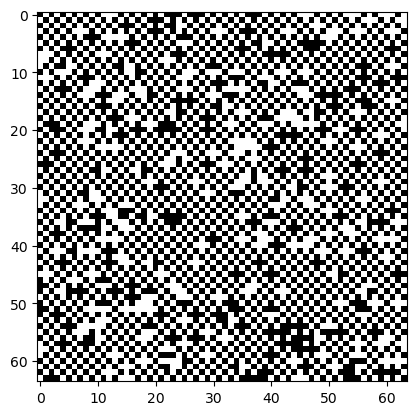

In [44]:
import random

def generate_chess_noise():
    grid = []
    for i in range(64):
        row = []
        for j in range(64):
            # Базовый шахматный узор: если сумма координат чётная – 1, иначе 0
            base = 1 if (i + j) % 2 == 0 else 0
            # С вероятностью 10% инвертируем значение
            if random.random() < 0.1:
                base = 1 - base
            row.append(base)
        grid.append(row)
    return 1 - np.array(grid)

print("Карта 34: Шахматный шум")
plt.imshow(generate_chess_noise(), cmap='gray')
plt.show()


Карта 35: Клеточный автомат — правило 110


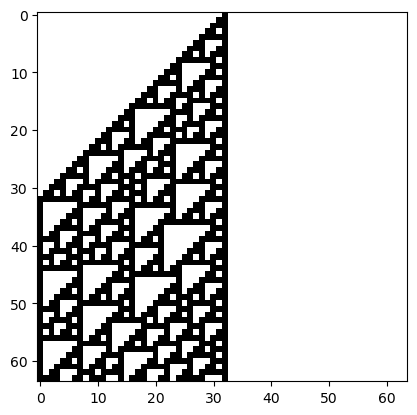

In [45]:
def generate_rule110():
    width = 64
    grid = []
    # Начальная строка: все 0, кроме центральной ячейки = 1
    row = [0] * width
    row[width // 2] = 1
    grid.append(row)
    for _ in range(63):
        new_row = [0] * width
        for j in range(width):
            left = row[j-1] if j-1 >= 0 else 0
            center_val = row[j]
            right = row[j+1] if j+1 < width else 0
            pattern = (left << 2) | (center_val << 1) | right
            # Правило 110: 111→0, 110→1, 101→1, 100→0, 011→1, 010→1, 001→1, 000→0
            if pattern in [0b110, 0b101, 0b011, 0b010, 0b001]:
                new_row[j] = 1
            else:
                new_row[j] = 0
        grid.append(new_row)
        row = new_row
    return 1 - np.array(grid)

print("\nКарта 35: Клеточный автомат — правило 110")
plt.imshow(generate_rule110(), cmap='gray')
plt.show()



Карта 36: Адаптивный шум


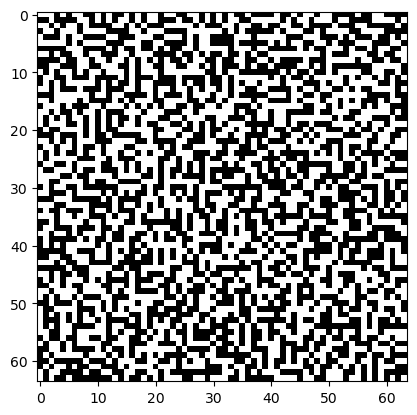

In [48]:
import random

def generate_adaptive_noise_map():
    # Генерируем шумовую карту с плавающими значениями
    grid = [[random.random() for _ in range(64)] for _ in range(64)]
    binary_grid = []
    for i in range(64):
        row = []
        for j in range(64):
            neighbors = []
            for di in range(-1, 2):
                for dj in range(-1, 2):
                    ni, nj = i + di, j + dj
                    if 0 <= ni < 64 and 0 <= nj < 64:
                        neighbors.append(grid[ni][nj])
            local_avg = sum(neighbors) / len(neighbors)
            row.append(1 if grid[i][j] > local_avg else 0)
        binary_grid.append(row)
    return 1 - np.array(binary_grid)

print("\nКарта 36: Адаптивный шум")
plt.imshow(generate_adaptive_noise_map(), cmap='gray')
plt.show()


Карта 37: Sierpinski Carpet


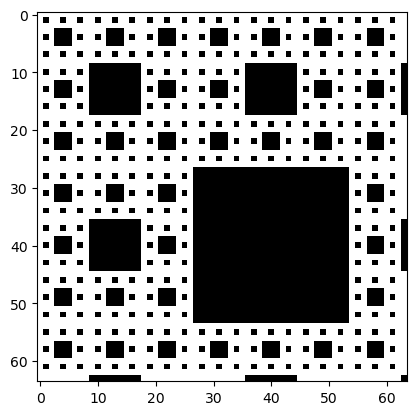

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def generate_sierpinski_carpet():
    grid = []
    for i in range(64):
        row = []
        for j in range(64):
            x, y = i, j
            cell = 1
            while x > 0 or y > 0:
                if x % 3 == 1 and y % 3 == 1:
                    cell = 0
                    break
                x //= 3
                y //= 3
            row.append(cell)
        grid.append(row)
    return np.array(grid)

print("Карта 37: Sierpinski Carpet")
plt.imshow(generate_sierpinski_carpet(), cmap='gray')
plt.show()



Карта 38: Клеточный автомат — правило 90


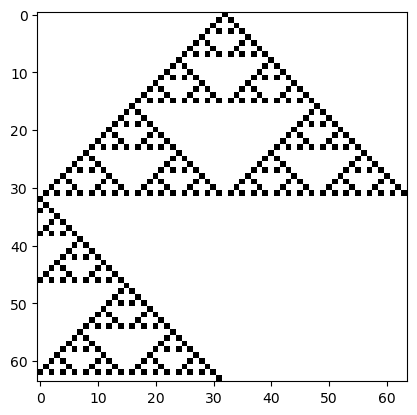

In [51]:
def generate_rule90():
    width = 64
    grid = []
    # Начальная строка: все 0, за исключением центральной ячейки
    row = [0] * width
    row[width // 2] = 1
    grid.append(row)
    for _ in range(63):
        new_row = [0] * width
        for j in range(width):
            left = row[j-1] if j-1 >= 0 else 0
            right = row[j+1] if j+1 < width else 0
            new_row[j] = left ^ right  # XOR левого и правого соседей
        grid.append(new_row)
        row = new_row
    return 1 - np.array(grid)

print("\nКарта 38: Клеточный автомат — правило 90")
plt.imshow(generate_rule90(), cmap='gray')
plt.show()



Карта 39: Хаотический аттрактор (Hénon Map)


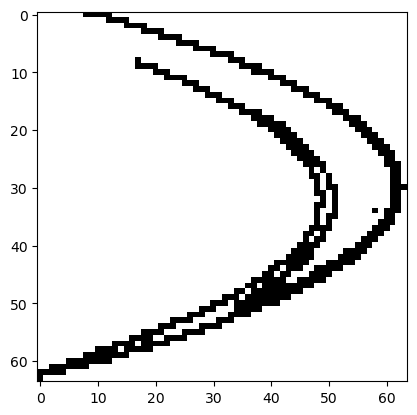

In [53]:
def generate_henon_attractor_map():
    a, b = 1.4, 0.3
    iterations = 15000
    # Начальные значения
    x, y = 0.1, 0.1
    points = []
    # Сбор данных (первые несколько итераций можно отбросить)
    for _ in range(iterations):
        x, y = 1 - a*x*x + y, b*x
        points.append((x, y))
    
    # Оценим приблизительные диапазоны для масштабирования
    xs = [p[0] for p in points]
    ys = [p[1] for p in points]
    min_x, max_x = min(xs), max(xs)
    min_y, max_y = min(ys), max(ys)
    
    # Создаем пустую карту 64x64
    grid = [[0 for _ in range(64)] for _ in range(64)]
    
    # Отображение координат аттрактора в индексы [0,63]
    for (x, y) in points:
        # Нормируем x и y в диапазон [0, 63]
        i = int((x - min_x) / (max_x - min_x) * 63)
        j = int((y - min_y) / (max_y - min_y) * 63)
        grid[j][i] = 1  # Обратите внимание: j – номер строки, i – столбец
    
    return 1 - np.array(grid)

print("\nКарта 39: Хаотический аттрактор (Hénon Map)")
plt.imshow(generate_henon_attractor_map(), cmap='gray')
plt.show()


Карта 40: Множество Мандельброта


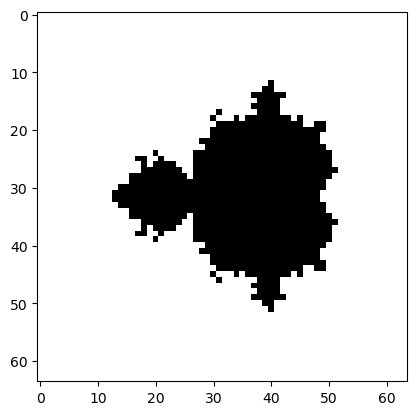

In [55]:
import math

def generate_mandelbrot_map():
    width, height = 64, 64
    max_iter = 20
    # Задаём область комплексной плоскости
    grid = []
    for y in range(height):
        row = []
        cy = y / (height - 1) * 3.0 - 1.5  # y от -1.5 до 1.5
        for x in range(width):
            cx = x / (width - 1) * 3.0 - 2.0  # x от -2.0 до 1.0
            c = complex(cx, cy)
            z = 0+0j
            iter_count = 0
            while abs(z) <= 2 and iter_count < max_iter:
                z = z*z + c
                iter_count += 1
            # Если точка не разошлась за max_iter итераций, считаем её принадлежащей множеству
            row.append(1 if iter_count == max_iter else 0)
        grid.append(row)
    return 1 - np.array(grid)

print("Карта 40: Множество Мандельброта")
plt.imshow(generate_mandelbrot_map(), cmap='gray')
plt.show()



Карта 41: Побитовое И


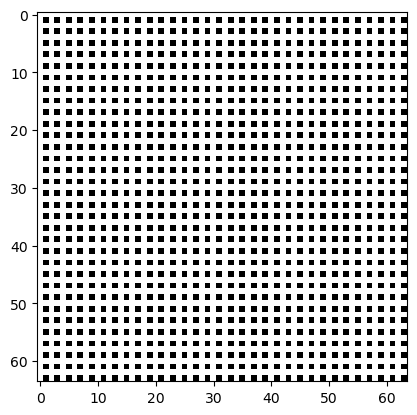

In [64]:
def generate_bitwise_and_map():
    grid = []
    for i in range(64):
        row = []
        for j in range(64):
            value = i & j
            row.append(1 if value % 2 == 0 else 0)
        grid.append(row)
    return grid

print("\nКарта 41: Побитовое И")
plt.imshow(generate_bitwise_and_map(), cmap='gray')
plt.show()


Карта 42: Лабиринт по алгоритму Прима


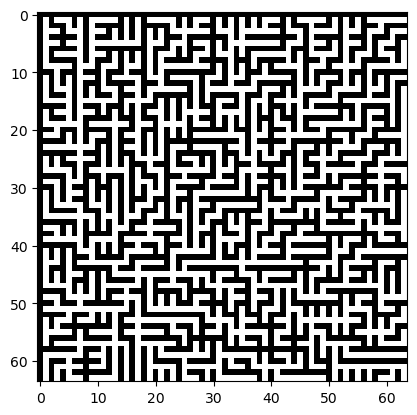

In [68]:
import random

def generate_maze_prim():
    width, height = 64, 64
    # Заполняем карту стенами (1)
    grid = [[1 for _ in range(width)] for _ in range(height)]
    # Матрица для отслеживания посещённых ячеек (только для ячеек с нечётными индексами)
    visited = [[False for _ in range(width)] for _ in range(height)]
    
    def add_walls(r, c, walls):
        for dr, dc in [(0,2), (2,0), (0,-2), (-2,0)]:
            nr, nc = r + dr, c + dc
            if 0 <= nr < height and 0 <= nc < width and not visited[nr][nc]:
                # Стена находится между (r,c) и (nr,nc)
                walls.append((r + dr//2, c + dc//2, nr, nc))
    
    # Выбираем случайную стартовую ячейку с нечётными индексами
    start_r = random.choice(range(1, height, 2))
    start_c = random.choice(range(1, width, 2))
    grid[start_r][start_c] = 0
    visited[start_r][start_c] = True
    walls = []
    add_walls(start_r, start_c, walls)
    
    while walls:
        idx = random.randrange(len(walls))
        wr, wc, nr, nc = walls.pop(idx)
        if not visited[nr][nc]:
            grid[wr][wc] = 0  # Удаляем стену
            grid[nr][nc] = 0  # Делаем клетку проходом
            visited[nr][nc] = True
            add_walls(nr, nc, walls)
    
    return 1 - np.array(grid)

print("\nКарта 42: Лабиринт по алгоритму Прима")
plt.imshow(generate_maze_prim(), cmap='gray')
plt.show()


Карта 43: Случайная замкнутая кривая


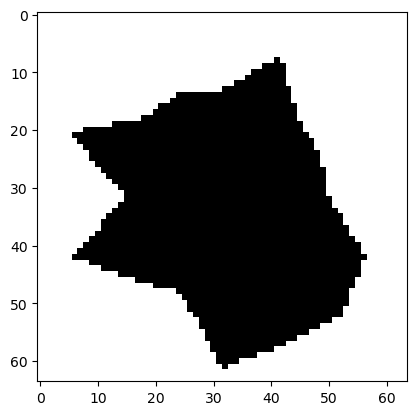

In [70]:
import random
import math

def point_in_poly(x, y, poly):
    """Определяет, лежит ли точка (x, y) внутри многоугольника poly (список (x, y))."""
    num = len(poly)
    j = num - 1
    c = False
    for i in range(num):
        if ((poly[i][1] > y) != (poly[j][1] > y)) and \
           (x < (poly[j][0] - poly[i][0]) * (y - poly[i][1]) / (poly[j][1] - poly[i][1] + 1e-9) + poly[i][0]):
            c = not c
        j = i
    return c

def generate_random_closed_curve_map():
    center = 32
    num_vertices = 16
    min_radius, max_radius = 15, 30
    vertices = []
    # Генерируем точки на основе равномерно распределённых углов с случайным радиусом
    for i in range(num_vertices):
        angle = 2 * math.pi * i / num_vertices
        radius = random.uniform(min_radius, max_radius)
        x = center + radius * math.cos(angle)
        y = center + radius * math.sin(angle)
        vertices.append((x, y))
    
    # Формируем карту: для каждой ячейки проверяем, находится ли центр ячейки внутри многоугольника
    grid = []
    for i in range(64):
        row = []
        for j in range(64):
            # Берём центр ячейки (j + 0.5, i + 0.5) (обратите внимание: x - горизонталь, y - вертикаль)
            if point_in_poly(j + 0.5, i + 0.5, vertices):
                row.append(1)
            else:
                row.append(0)
        grid.append(row)
    return 1 - np.array(grid)

print("Карта 43: Случайная замкнутая кривая")
plt.imshow(generate_random_closed_curve_map(), cmap='gray')
plt.show()



Карта 44: Комбинированные квадранты


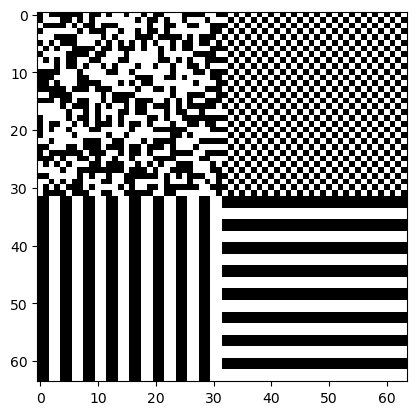

In [76]:
import random

def generate_quadrant_map():
    size = 64
    half = size // 2
    grid = [[0 for _ in range(size)] for _ in range(size)]
    
    # Верхний левый: случайный шум
    for i in range(half):
        for j in range(half):
            grid[i][j] = 1 if random.random() < 0.5 else 0
    
    # Верхний правый: шахматная доска
    for i in range(half):
        for j in range(half, size):
            grid[i][j] = 1 if ((i + j) % 2 == 0) else 0
    
    # Нижний левый: вертикальные полосы (каждый 4-й столбец чередуется)
    for i in range(half, size):
        for j in range(half):
            grid[i][j] = 1 if (j % 4 < 2) else 0
    
    # Нижний правый: горизонтальные полосы (каждая 4-я строка чередуется)
    for i in range(half, size):
        for j in range(half, size):
            grid[i][j] = 1 if ((i - half) % 4 < 2) else 0
    
    return 1 - np.array(grid)

print("\nКарта 44: Комбинированные квадранты")
plt.imshow(generate_quadrant_map(), cmap='gray')
plt.show()



Карта 45: Итеративный фильтр большинства


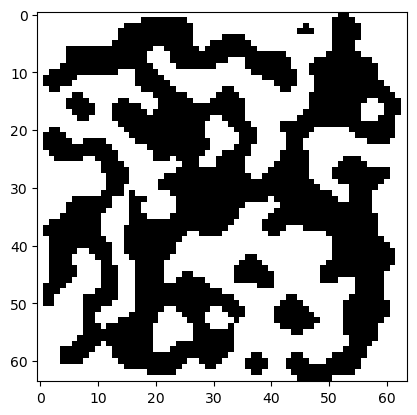

In [79]:
import random

def generate_majority_filter_map(iterations=5):
    size = 64
    # Начальная случайная карта
    grid = [[1 if random.random() < 0.5 else 0 for _ in range(size)] for _ in range(size)]
    
    for _ in range(iterations):
        new_grid = [[0]*size for _ in range(size)]
        for i in range(size):
            for j in range(size):
                count = 0
                for di in (-1, 0, 1):
                    for dj in (-1, 0, 1):
                        ni, nj = i + di, j + dj
                        if 0 <= ni < size and 0 <= nj < size:
                            count += grid[ni][nj]
                # Если больше половины (из 9 ячеек) равны 1, ставим 1, иначе 0
                new_grid[i][j] = 1 if count > 4 else 0
        grid = new_grid
    return 1 - np.array(grid)

print("\nКарта 45: Итеративный фильтр большинства")
plt.imshow(generate_majority_filter_map(), cmap='gray')
plt.show()


Карта 46: Прибрежная эрозия


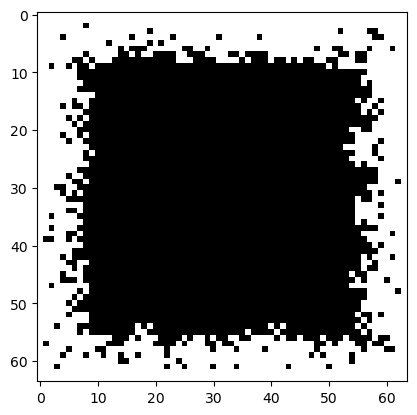

In [81]:
import random

def generate_coastal_erosion_map(iterations=10, p=0.3):
    size = 64
    # Изначально всё заполнено единицами, затем задаём границу из 0
    grid = [[1 for _ in range(size)] for _ in range(size)]
    for i in range(size):
        grid[0][i] = 0
        grid[size-1][i] = 0
        grid[i][0] = 0
        grid[i][size-1] = 0

    # Итеративная эрозия
    for _ in range(iterations):
        new_grid = [row[:] for row in grid]
        for i in range(1, size-1):
            for j in range(1, size-1):
                if grid[i][j] == 1:
                    # Проверяем 8 соседей
                    neighbors = [
                        grid[i-1][j], grid[i+1][j],
                        grid[i][j-1], grid[i][j+1],
                        grid[i-1][j-1], grid[i-1][j+1],
                        grid[i+1][j-1], grid[i+1][j+1]
                    ]
                    if 0 in neighbors and random.random() < p:
                        new_grid[i][j] = 0
        grid = new_grid
    return 1 - np.array(grid)

print("Карта 46: Прибрежная эрозия")
plt.imshow(generate_coastal_erosion_map(), cmap='gray')
plt.show()



Карта 47: Рандомное разбиение по квадрантам (Quadtree)


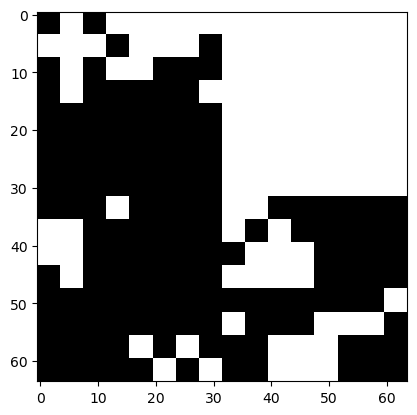

In [87]:
import random

def fill_region(grid, x, y, size, value):
    for i in range(y, y+size):
        for j in range(x, x+size):
            grid[i][j] = value

def quadtree_partition(grid, x, y, size, min_size=4, split_prob=0.7):
    # Если область слишком мала или случайное число ниже порога – заполняем всей областью случайным значением
    if size <= min_size or random.random() > split_prob:
        fill_region(grid, x, y, size, random.choice([0, 1]))
    else:
        half = size // 2
        quadtree_partition(grid, x, y, half, min_size, split_prob)
        quadtree_partition(grid, x + half, y, half, min_size, split_prob)
        quadtree_partition(grid, x, y + half, half, min_size, split_prob)
        quadtree_partition(grid, x + half, y + half, half, min_size, split_prob)

def generate_quadtree_map():
    size = 64
    grid = [[0 for _ in range(size)] for _ in range(size)]
    quadtree_partition(grid, 0, 0, size)
    return 1 - np.array(grid)

print("\nКарта 47: Рандомное разбиение по квадрантам (Quadtree)")
plt.imshow(generate_quadtree_map(), cmap='gray')
plt.show()



Карта 48: Морфологически расширенный шум


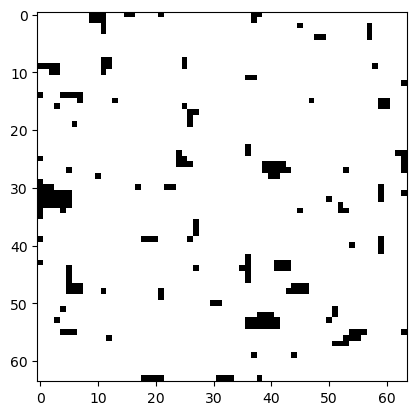

In [90]:
import random

def generate_dilated_noise_map():
    size = 64
    # Изначальный шум: вероятность 1 равна 0.3
    grid = [[1 if random.random() < 0.3 else 0 for _ in range(size)] for _ in range(size)]
    
    new_grid = [[0 for _ in range(size)] for _ in range(size)]
    for i in range(size):
        for j in range(size):
            # Если клетка или хотя бы один из 8 соседей равен 1, ставим 1
            found = False
            for di in (-1, 0, 1):
                for dj in (-1, 0, 1):
                    ni, nj = i + di, j + dj
                    if 0 <= ni < size and 0 <= nj < size:
                        if grid[ni][nj] == 1:
                            found = True
                            break
                if found:
                    break
            new_grid[i][j] = 0 if found else 1
    return 1 - np.array(new_grid)

print("\nКарта 48: Морфологически расширенный шум")
plt.imshow(generate_dilated_noise_map(), cmap='gray')
plt.show()


Карта 49: Драконий узор


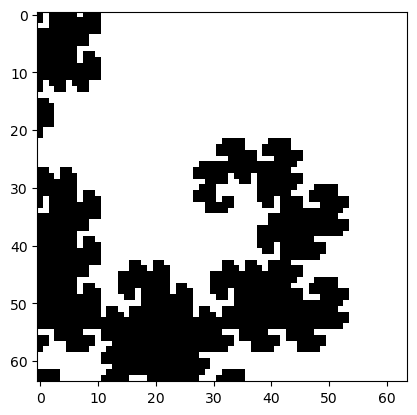

In [106]:
def generate_dragon_curve_map(iterations=13):
    # Генерация L-системы для драконовой кривой:
    # Аксиома: "FX"
    # Правила: X -> X+YF+,  Y -> -FX-Y
    axiom = "FX"
    rules = {"X": "X+YF+", "Y": "-FX-Y"}
    sequence = axiom
    for _ in range(iterations):
        new_seq = ""
        for ch in sequence:
            new_seq += rules.get(ch, ch)
        sequence = new_seq

    # Интерпретация строки: F - шаг вперед, "+" - поворот направо, "-" - поворот налево.
    # Будем использовать дискретное направление: 0 - вправо, 1 - вверх, 2 - влево, 3 - вниз.
    size = 64
    grid = [[0 for _ in range(size)] for _ in range(size)]
    x, y = size // 2, size // 2
    direction = 0  # начальное направление вправо
    grid[y][x] = 1
    moves = {0: (1, 0), 1: (0, -1), 2: (-1, 0), 3: (0, 1)}
    
    for ch in sequence:
        if ch == "F":
            dx, dy = moves[direction]
            x += dx
            y += dy
            if 0 <= x < size and 0 <= y < size:
                grid[y][x] = 1
        elif ch == "+":
            direction = (direction - 1) % 4  # поворот направо
        elif ch == "-":
            direction = (direction + 1) % 4  # поворот налево
    
    return 1 - np.array(grid)

print("Карта 49: Драконий узор")
plt.imshow(generate_dragon_curve_map(), cmap='gray')
plt.show()



Карта 50: Перемешивание блоков


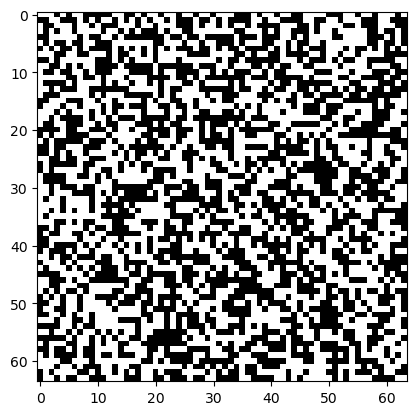

In [112]:
import random

def generate_block_shuffle_map():
    size = 64
    block_size = 8
    # Создаем карту случайного шума
    grid = [[random.choice([0, 1]) for _ in range(size)] for _ in range(size)]
    
    # Разбиваем карту на блоки
    blocks = []
    for bi in range(0, size, block_size):
        row_blocks = []
        for bj in range(0, size, block_size):
            block = [grid[i][bj:bj+block_size] for i in range(bi, bi+block_size)]
            row_blocks.append(block)
        blocks.append(row_blocks)
    
    # Перемешиваем блоки (плоский список)
    flat_blocks = [block for row in blocks for block in row]
    random.shuffle(flat_blocks)
    
    # Собираем перемешанные блоки обратно в матрицу
    new_blocks = []
    idx = 0
    for _ in range(len(blocks)):
        new_row = []
        for _ in range(len(blocks[0])):
            new_row.append(flat_blocks[idx])
            idx += 1
        new_blocks.append(new_row)
    
    # Собираем финальную карту из блоков
    new_grid = [['' for _ in range(size)] for _ in range(size)]
    for bi in range(len(new_blocks)):
        for bj in range(len(new_blocks[0])):
            block = new_blocks[bi][bj]
            for i in range(block_size):
                new_grid[bi * block_size + i][bj * block_size : bj * block_size + block_size] = block[i]
    
    return 1 - np.array(new_grid)

print("\nКарта 50: Перемешивание блоков")
plt.imshow(generate_block_shuffle_map(), cmap='gray')
plt.show()



Карта 51: Мойрирование


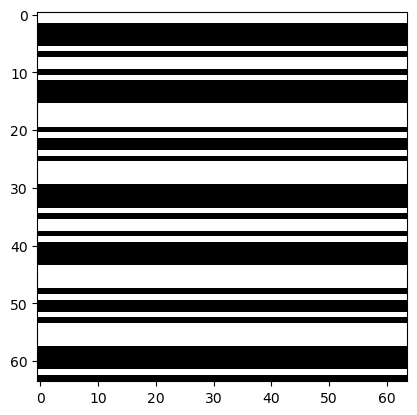

In [114]:
def generate_moire_map():
    size = 64
    grid = [[0 for _ in range(size)] for _ in range(size)]
    # Формируем два паттерна: горизонтальные полосы с разными периодами
    period_a = 4
    period_b = 7
    pattern_a = [[1 if (i % period_a) < period_a / 2 else 0 for _ in range(size)] for i in range(size)]
    pattern_b = [[1 if (i % period_b) < period_b / 2 else 0 for _ in range(size)] for i in range(size)]
    
    # Комбинируем паттерны с помощью XOR: если символы отличаются – 1, если совпадают – 0
    for i in range(size):
        for j in range(size):
            grid[i][j] = 1 if pattern_a[i][j] != pattern_b[i][j] else 0
    return 1 - np.array(grid)

print("\nКарта 51: Мойрирование")
plt.imshow(generate_moire_map(), cmap='gray')
plt.show()


Карта 52: Горизонтальный градиент паттернов


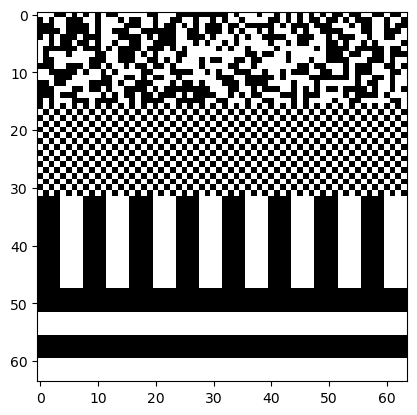

In [117]:
import random

def generate_horizontal_gradient_map():
    size = 64
    grid = [[0 for _ in range(size)] for _ in range(size)]
    for i in range(size):
        for j in range(size):
            if i < 16:
                # Случайный шум: вероятность 50% для 1
                grid[i][j] = 1 if random.random() < 0.5 else 0
            elif i < 32:
                # Шахматный узор
                grid[i][j] = 1 if (i + j) % 2 == 0 else 0
            elif i < 48:
                # Вертикальные полосы: каждые 4 столбца чередуются
                grid[i][j] = 1 if (j // 4) % 2 == 0 else 0
            else:
                # Горизонтальные полосы: каждые? 4 строки чередуются
                grid[i][j] = 1 if ((i - 48) // 4) % 2 == 0 else 0
    return 1 - np.array(grid)

print("Карта 52: Горизонтальный градиент паттернов")
plt.imshow(generate_horizontal_gradient_map(), cmap='gray')
plt.show()



Карта 53: Fault Formation


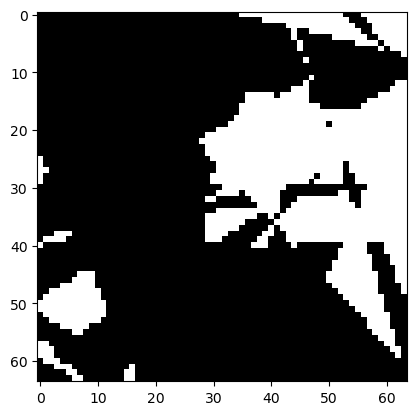

In [122]:
import random, math

def generate_fault_formation_map(iterations=50, delta=0.1):
    size = 64
    # Изначально все значения равны 0
    grid = [[0.0 for _ in range(size)] for _ in range(size)]
    for _ in range(iterations):
        # Случайный угол и прямая: a*x + b*y + c = 0
        theta = random.uniform(0, 2*math.pi)
        a = math.cos(theta)
        b = math.sin(theta)
        c = random.uniform(-size, size)
        # Обновляем значения клеток: добавляем delta, если клетка находится по одной стороне прямой, иначе вычитаем
        for i in range(size):
            for j in range(size):
                if a*i + b*j + c > 0:
                    grid[i][j] += delta
                else:
                    grid[i][j] -= delta
    # Пороговая бинаризация: если значение > 0, ставим 1, иначе 0
    binary_grid = []
    for i in range(size):
        row = []
        for j in range(size):
            row.append(1 if grid[i][j] > 0 else 0)
        binary_grid.append(row)
    return 1 - np.array(binary_grid)

print("\nКарта 53: Fault Formation")
plt.imshow(generate_fault_formation_map(), cmap='gray')
plt.show()



Карта 54: Каскадный циклический сдвиг


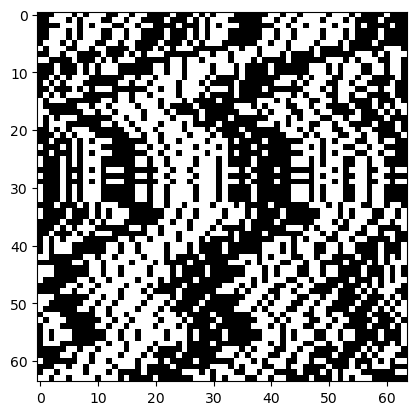

In [131]:
import random

def generate_cascade_shift_map():
    size = 64
    grid = []
    # Начинаем со случайной строки
    row = [random.choice([0, 1]) for _ in range(size)]
    grid.append(row)
    for _ in range(1, size):
        shift = random.randint(-5, 5)
        if shift > 0:
            # Циклический сдвиг вправо
            new_row = row[-shift:] + row[:-shift]
        elif shift < 0:
            # Циклический сдвиг влево
            shift = abs(shift)
            new_row = row[shift:] + row[:shift]
        else:
            new_row = row[:]
        row = new_row
        grid.append(row)
    return 1 - np.array(grid)

print("\nКарта 54: Каскадный циклический сдвиг")
plt.imshow(generate_cascade_shift_map(), cmap='gray')
plt.show()


Карта 55: Контурное расстояние


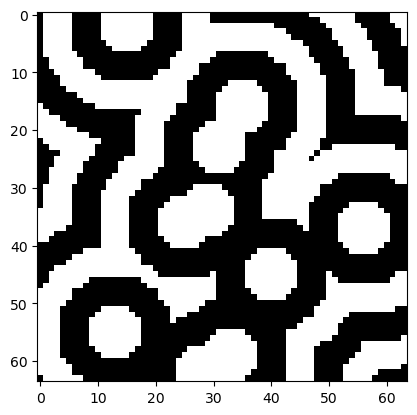

In [133]:
import random, math

def generate_distance_field_contours():
    size = 64
    num_seeds = 10
    # Генерируем случайные координаты семян
    seeds = [(random.randint(0, size-1), random.randint(0, size-1)) for _ in range(num_seeds)]
    grid = []
    for i in range(size):
        row = []
        for j in range(size):
            min_dist_sq = float('inf')
            for (sx, sy) in seeds:
                d_sq = (i - sx)**2 + (j - sy)**2
                if d_sq < min_dist_sq:
                    min_dist_sq = d_sq
            d = math.sqrt(min_dist_sq)
            # Используем ширину кольца в 5 пикселей
            row.append(1 if int(d // 5) % 2 == 0 else 0)
        grid.append(row)
    return grid

print("Карта 55: Контурное расстояние")
plt.imshow(generate_distance_field_contours(), cmap='gray')
plt.show()


Карта 56: Выделение краев


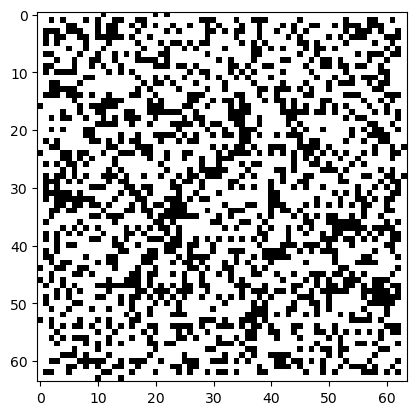

In [136]:
import random

def generate_edge_detection_noise():
    size = 64
    # Исходный шум
    grid = [[1 if random.random() < 0.5 else 0 for _ in range(size)] for _ in range(size)]
    new_grid = [[0 for _ in range(size)] for _ in range(size)]
    for i in range(size):
        for j in range(size):
            count_diff = 0
            current = grid[i][j]
            for di in (-1, 0, 1):
                for dj in (-1, 0, 1):
                    if di == 0 and dj == 0:
                        continue
                    ni, nj = i + di, j + dj
                    if 0 <= ni < size and 0 <= nj < size:
                        if grid[ni][nj] != current:
                            count_diff += 1
            new_grid[i][j] = 1 if count_diff >= 5 else 0
    return 1 - np.array(new_grid)

print("\nКарта 56: Выделение краев")
plt.imshow(generate_edge_detection_noise(), cmap='gray')
plt.show()



Карта 57: Фрактальное броуновское движение (fBm)


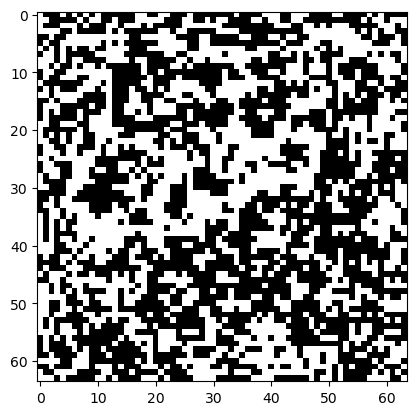

In [143]:
import random

def bilerp(x, y, q11, q21, q12, q22):
    # Билинейная интерполяция
    r1 = q11 + x * (q21 - q11)
    r2 = q12 + x * (q22 - q12)
    return r1 + y * (r2 - r1)

def generate_fbm_binary_map(octaves=4, persistence=0.5):
    size = 64
    fbm = [[0.0 for _ in range(size)] for _ in range(size)]
    
    for octave in range(octaves):
        frequency = 2 ** octave
        amplitude = persistence ** octave
        coarse_size = (size // frequency) + 1
        coarse = [[random.random() for _ in range(coarse_size)] for _ in range(coarse_size)]
        
        for i in range(size):
            for j in range(size):
                # Преобразование координат в пространство грубой сетки
                x = j / (size - 1) * (coarse_size - 1)
                y = i / (size - 1) * (coarse_size - 1)
                x0 = int(x)
                y0 = int(y)
                x1 = min(x0 + 1, coarse_size - 1)
                y1 = min(y0 + 1, coarse_size - 1)
                dx = x - x0
                dy = y - y0
                value = bilerp(dx, dy, coarse[y0][x0], coarse[y0][x1], coarse[y1][x0], coarse[y1][x1])
                fbm[i][j] += amplitude * value

    # Нормализация
    min_val = min(min(row) for row in fbm)
    max_val = max(max(row) for row in fbm)
    normalized = [[(fbm[i][j] - min_val) / (max_val - min_val) for j in range(size)] for i in range(size)]
    
    # Бинаризация по порогу 0.5
    binary_map = [[1 if normalized[i][j] > 0.5 else 0 for j in range(size)] for i in range(size)]
    return 1 - np.array(binary_map)

print("\nКарта 57: Фрактальное броуновское движение (fBm)")
plt.imshow(generate_fbm_binary_map(), cmap='gray')
plt.show()


Карта 58: Chaos Game Sierpinski Triangle


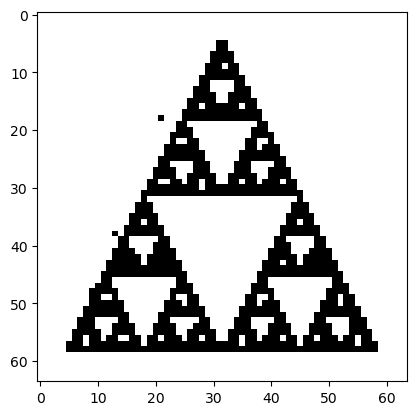

In [155]:
import random

def generate_chaos_game_sierpinski():
    size = 64
    grid = [[0 for _ in range(size)] for _ in range(size)]
    # Выбираем вершины равностороннего треугольника, вписанного в сетку
    vertices = [(32, 5), (5, 59), (59, 59)]
    # Стартовая точка – случайная
    x, y = random.randint(0, size-1), random.randint(0, size-1)
    iterations = 10000
    for _ in range(iterations):
        vx, vy = random.choice(vertices)
        # Двигаемся на половину расстояния до выбранной вершины
        x = (x + vx) // 2
        y = (y + vy) // 2
        grid[y][x] = 1
    return 1 - np.array(grid)

print("Карта 58: Chaos Game Sierpinski Triangle")
plt.imshow(generate_chaos_game_sierpinski(), cmap='gray')
plt.show()



Карта 59: Random Convolution Filter


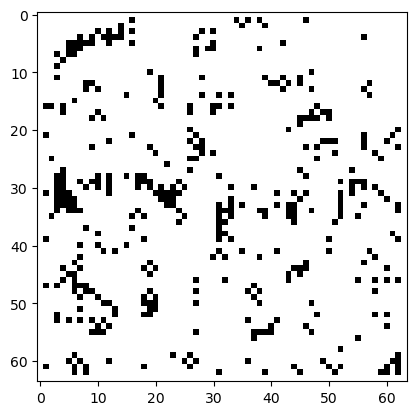

In [166]:
import random

def generate_random_convolution_map():
    size = 64
    # Генерируем исходный шум
    grid = [[random.choice([0,1]) for _ in range(size)] for _ in range(size)]
    # Случайное 3x3 ядро
    kernel = [[random.choice([0,1]) for _ in range(3)] for _ in range(3)]
    new_grid = [[0 for _ in range(size)] for _ in range(size)]
    for i in range(size):
        for j in range(size):
            s = 0
            for ki in range(-1, 2):
                for kj in range(-1, 2):
                    ni = i + ki
                    nj = j + kj
                    if 0 <= ni < size and 0 <= nj < size:
                        s += grid[ni][nj] * kernel[ki+1][kj+1]
            # Порог: если сумма ≥ 5, ставим 1, иначе 0
            new_grid[i][j] = 1 if s >= 5 else 0
    return 1 - np.array(new_grid)

print("\nКарта 59: Random Convolution Filter")
plt.imshow(generate_random_convolution_map(), cmap='gray')
plt.show()


Карта 60: 90° Rotational Symmetry


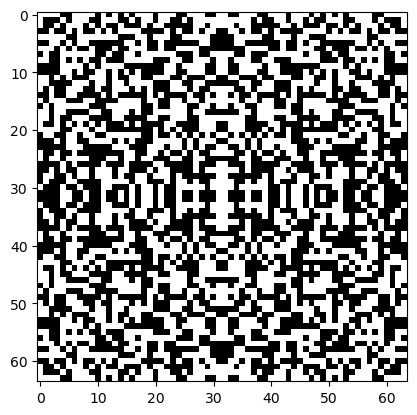

In [171]:
import random

def generate_rotational_symmetry_map():
    size = 64
    half = size // 2
    # Генерируем случайный узор для верхнего левого квадранта
    quadrant = [[random.choice([0,1]) for _ in range(half)] for _ in range(half)]
    grid = [[0 for _ in range(size)] for _ in range(size)]
    # Заполняем верхний левый квадрант
    for i in range(half):
        for j in range(half):
            grid[i][j] = quadrant[i][j]
    # Зеркальное отражение по горизонтали – верхний правый квадрант
    for i in range(half):
        for j in range(half):
            grid[i][size-1-j] = quadrant[i][j]
    # Зеркальное отражение по вертикали – нижний левый квадрант
    for i in range(half):
        for j in range(half):
            grid[size-1-i][j] = quadrant[i][j]
    # Нижний правый квадрант – зеркальное отражение по обеим осям
    for i in range(half):
        for j in range(half):
            grid[size-1-i][size-1-j] = quadrant[i][j]
    return 1 - np.array(grid)

print("\nКарта 60: 90° Rotational Symmetry")
plt.imshow(generate_rotational_symmetry_map(), cmap='gray')
plt.show()


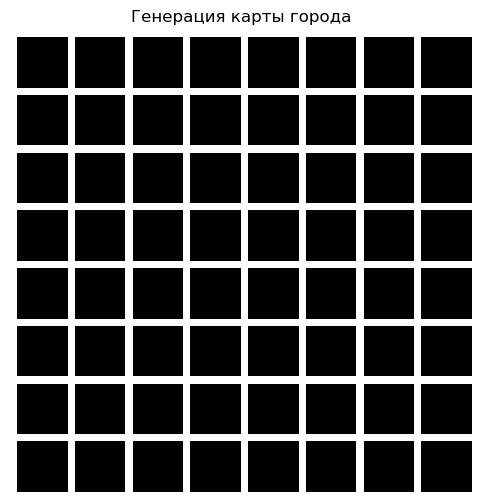

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def generate_city_map(size=64, block_size=8):
    # Создаём массив, заполненный единицами (застроенные кварталы)
    city_map = np.ones((size, size), dtype=int)
    
    # Обнуляем каждую block_size-ю строку для создания горизонтальных дорог
    for i in range(0, size, block_size):
        city_map[i, :] = 0

    # Обнуляем каждый block_size-й столбец для создания вертикальных дорог
    for j in range(0, size, block_size):
        city_map[:, j] = 0

    return city_map

# Генерация карты
city_map = generate_city_map()

# Отображение карты
plt.figure(figsize=(6,6))
plt.imshow(1 - city_map, cmap='gray', interpolation='nearest')
plt.title('Генерация карты города')
plt.axis('off')
plt.show()


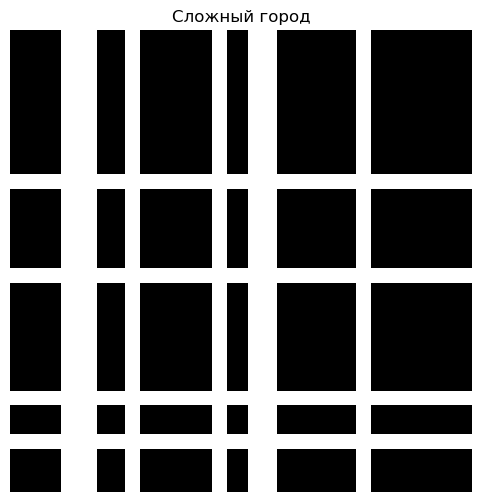

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def generate_complex_city_map(size=64, road_width=2, min_roads=4, max_roads=8, seed=None):
    """
    Генерирует бинарную карту города:
      - 1 обозначает застроенную территорию.
      - 0 обозначает дорогу.
    В городе случайным образом выбираются позиции для вертикальных и горизонтальных дорог,
    при этом дорога занимает road_width столбцов или строк.
    """
    
    # Заполняем карту застроенными кварталами (1)
    city_map = np.ones((size, size), dtype=int)
    
    # Определяем случайное количество вертикальных дорог
    num_v_roads = np.random.randint(min_roads, max_roads+1)
    # Выбираем случайные позиции, избегая слишком близкого расположения к краям
    v_positions = np.sort(np.random.choice(np.arange(2, size - road_width - 2), 
                                             size=num_v_roads, replace=False))
    
    # Определяем случайное количество горизонтальных дорог
    num_h_roads = np.random.randint(min_roads, max_roads+1)
    h_positions = np.sort(np.random.choice(np.arange(2, size - road_width - 2), 
                                             size=num_h_roads, replace=False))
    
    # Обозначаем вертикальные дороги (обнуляем соответствующие столбцы)
    for pos in v_positions:
        city_map[:, pos:pos+road_width] = 0
    
    # Обозначаем горизонтальные дороги (обнуляем соответствующие строки)
    for pos in h_positions:
        city_map[pos:pos+road_width, :] = 0
        
    return city_map, v_positions, h_positions

# Генерация сложной карты города
city_map, v_positions, h_positions = generate_complex_city_map(seed=42)

# Отображение карты
plt.figure(figsize=(6,6))
plt.imshow(1 - city_map, cmap='gray', interpolation='nearest')
plt.title('Сложный город')
plt.axis('off')
plt.show()
